<a href="https://colab.research.google.com/github/Mhtag/tensorflow/blob/main/08_image_classification_with_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats and Dogs image qualification with Augmentation

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##1. Data Loading

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68616192/68606236 [==============================] - 2s 0us/step


The dataset we have downloaded has following directory structure.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

In [3]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


We'll now assign variables with the proper file path for the training and validation sets.

In [4]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

###1.1 Understanding the data

Lets see how many how cats and dogs image is in our train and validation dataset

In [7]:
print('Dogs images in our train dataset     ', len(os.listdir(train_dogs_dir)))
print('Dogs images in our validation dataset', len(os.listdir(validation_dogs_dir)))
print()
print('Cats images in our train dataset     ', len(os.listdir(train_cats_dir)))
print('cats images in our validation dataset', len(os.listdir(validation_cats_dir)))



Dogs images in our train dataset      1000
Dogs images in our validation dataset 500

Cats images in our train dataset      1000
cats images in our validation dataset 500


##2 Data Augmentation

Overfitting often occurs when we have a small number of training examples. One way to fix this problem is to augment our dataset so that it has sufficient number and variety of training examples. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples through random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This exposes the model to more aspects of the data, allowing it to generalize better.

In **tf.keras** we can implement this using **ImageDataGenerator**. We can simply pass different transformations we would want to our dataset as a form of arguments and it will take care of applying it to the dataset during our training process.

TO start of lets define a function to display image and to see type of augmentation it has performed.

In [23]:
def plot_image(images_array):
  fig, axes = plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img, ax in zip(images_array, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()


###2.1 Flipping the image horizontally

We can begin by randomly applying horizontal flip augmentation to our dataset and seeing how individual images will look after the transformation. This is achieved by passing **horizontal_flip=True** as an argument to the **ImageDataGenerator** class.

**flow_from_directory** methods will load images from disk, apply rescaling and resize them will single line of code.

In [9]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)



In [10]:
train_data_gen = image_gen.flow_from_directory(batch_size=100,
                                               directory=train_dir,
                                               target_size=(150,150),
                                               shuffle=True)

Found 2000 images belonging to 2 classes.


In [21]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

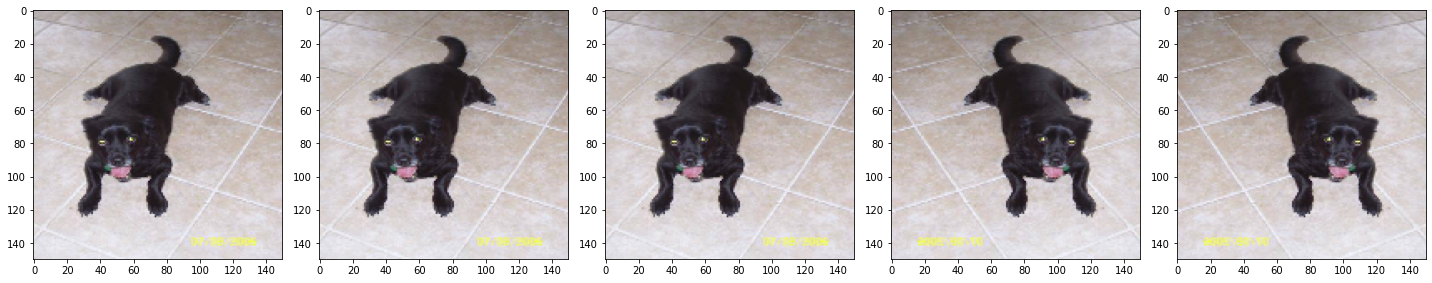

In [26]:
plot_image(augmented_images)

###2.2 Rotating the Images

The rotation augmentation will randomly rotate the image up to a specified number of degrees using thee argument **rotation_range**. Here, we'll set it to 45.

In [27]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)


In [28]:
train_data_gen = image_gen.flow_from_directory(directory=train_dir,
                                               target_size=(150,150),
                                               batch_size=100,
                                               shuffle=True)

Found 2000 images belonging to 2 classes.


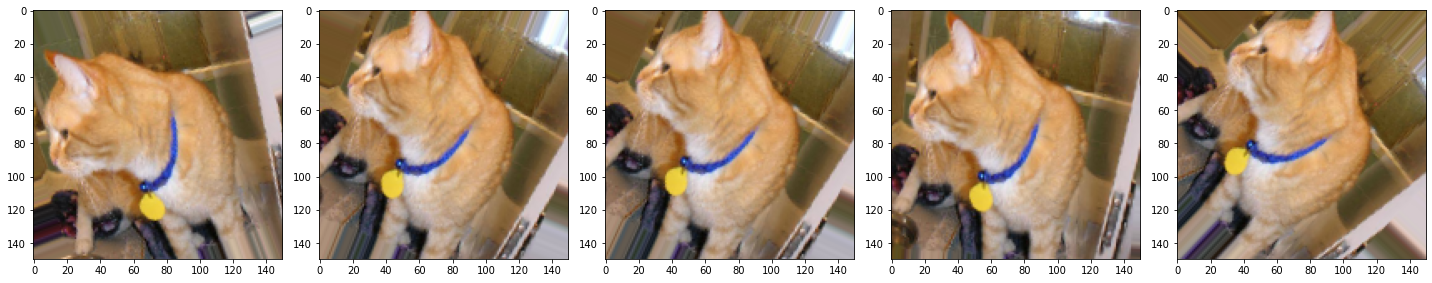

In [29]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_image(augmented_images)

###2.3 Applying Zoom

We can also apply Zoom augmentation to our dataset, zooming images up to 50% randomly using the argument **zoom_range** in **ImageDataGenerator**

In [30]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=100,
                                               target_size=(150,150),
                                               directory=train_dir,
                                               shuffle=True)

Found 2000 images belonging to 2 classes.


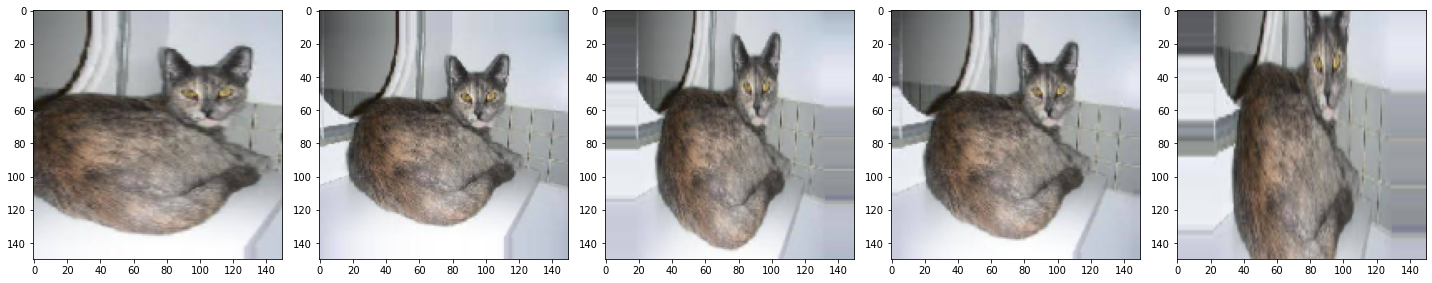

In [31]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_image(augmented_images)

###2.4 Putting it all together

In [62]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(directory=train_dir,
                                                     target_size=(150,150),
                                                     shuffle=True,
                                                     batch_size=100,
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


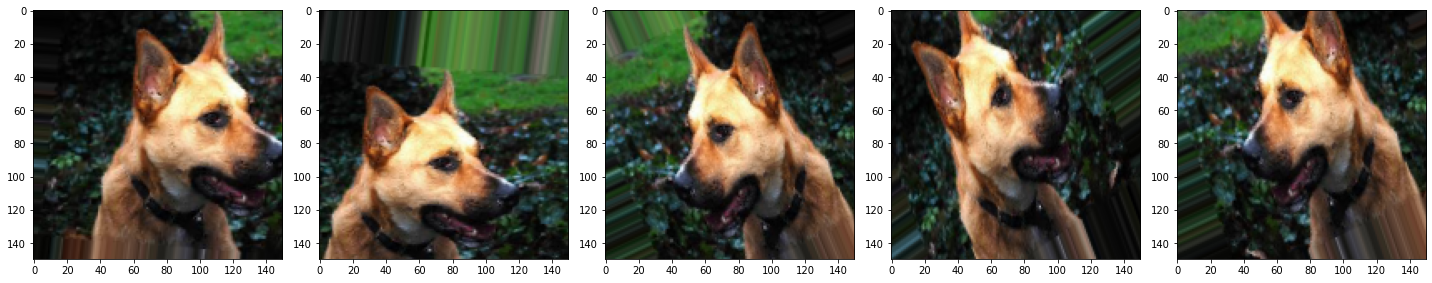

In [37]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_image(augmented_images)

###2.5 Creating Validation Data Generator

Generally, we only apply data augmentation to our training examples, since the original images should be representative of what our model needs to manage. So, in this case we are only rescaling our validation images and converting them into batches using ImageDataGenerator.

In [63]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(directory=validation_dir,
                                                 target_size=(150,150),
                                                 batch_size=100,
                                                 shuffle=True,
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


##3 Model Creation

###3.1 Model with Dropout

The model consists of four convolution blocks with a max pool layer in each of them.

Before the final Dense layers, we're also applying a Dropout probability of 0.5. It means that 50% of the values coming into the Dropout layer will be set to zero. This helps to prevent overfitting.

Then we have a fully connected layer with 512 units, with a `relu` activation function. The model will output class probabilitie

In [65]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Dropout(0.5),        # Dropout
  tf.keras.layers.Flatten(),           # Faltten
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(2)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='Adam',
              metrics=['accuracy'])

###3.2 Model Summary

In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

###3.3 Train the Model

In [67]:
history_ = model.fit_generator(
                    train_data_gen,
                    epochs=50,
                    steps_per_epoch = 20,
                    validation_data=val_data_gen,
                    validation_steps = 10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
 1/20 [>.............................] - ETA: 2:15 - loss: 0.6923 - accuracy: 0.5200

KeyboardInterrupt: ignored

###3.4 Vizualizing the result of Training

In [60]:
df = pd.DataFrame(history.history.values()).T
df.columns = history.history.keys()
df.head()

In [ ]:
df.plot(figsize=(10,6))